In [92]:
using Plots
using HDF5
using MAT

In [80]:
data_dir = "/home/hf/imaris9/20200315-11-2-80uw-const/cells/nice/"
nucleus_name = filter(x->occursin(r"].ims$", x), readdir(data_dir) );

t_len= 125
all_spots = zeros(Int16, length(nucleus_name), t_len)
#@time for i in 10
@time for i in 1:length(nucleus_name)
    c = h5open("/home/hf/imaris9/20200315-11-2-80uw-const/cells/nice/$(nucleus_name[i])", "r") do file  
        #println(nucleus_name[i])
        local spots = read(file, "Scene8/Content/Points0/SpotTimeOffset")
        if length(spots) > 1
            for α in 1:length(spots)
                all_spots[i, spots[α][:ID]+1] = spots[α][:IndexEnd] - spots[α][:IndexBegin]
            end
        end
    end
end

  0.208398 seconds (20.76 k allocations: 868.837 KiB)


In [3]:
data_dir = "/home/hf/imaris9/20200315-11-2-80uw-const/cells2/nice"
nucleus_name = filter(x->occursin(r"].ims$", x), readdir(data_dir) );

SystemError: SystemError: unable to read directory /home/hf/imaris9/20200315-11-2-80uw-const/: No such file or directory

In [80]:
data_dir = "/home/hf/imaris9/20200315-11-2-80uw-const/cells2/nice/"
nucleus_name = filter(x->occursin(r"].ims$", x), readdir(data_dir) );

t_len= 125
all_spots = zeros(Int16, length(nucleus_name), t_len)
#@time for i in 10
@time for i in 1:length(nucleus_name)
    c = h5open("/home/hf/imaris9/20200315-11-2-80uw-const/cells/nice/$(nucleus_name[i])", "r") do file  
        #println(nucleus_name[i])
        local spots = read(file, "Scene8/Content/Points0/SpotTimeOffset")
        if length(spots) > 1
            for α in 1:length(spots)
                all_spots[i, spots[α][:ID]+1] = spots[α][:IndexEnd] - spots[α][:IndexBegin]
            end
        end
    end
end

  0.208398 seconds (20.76 k allocations: 868.837 KiB)


In [99]:
mat = matopen("matfile.mat", "w")
write(mat, "all_mRNA", all_spots)
write(mat, "index2pos", nucleus_name)
close(mat)

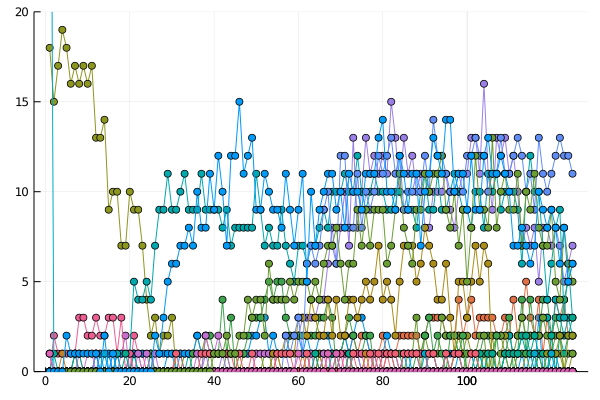

In [91]:
plot(leg=false, marker=:circle)
for i in 1:length(nucleus_name)
    plot!(all_spots[i, :], marker=:circle)
end
plot!(ylims=(0,20))